In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import tree

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a

In [2]:
# read data
oct_data_path = '../../data/October_data.csv'
nov_data_path = '../../data/November_Data.csv'
dec_data_path = '../../data/December_Data.csv'
feb_data_path = '../../data/February_Data.csv'
jan_data_path = '../../data/January_Data.csv'
oct_df = pd.read_csv(oct_data_path)
nov_df = pd.read_csv(nov_data_path)
dec_df = pd.read_csv(dec_data_path)
jan_df = pd.read_csv(jan_data_path)
feb_df = pd.read_csv(feb_data_path)

In [3]:
df_tseries = pd.concat([oct_df, nov_df, dec_df, jan_df, feb_df])

In [4]:
df_tseries.head()

,Unnamed: 0,time_stamp,block,hash,totalfee,confirmation,gasprice,gasamt,past_min,past_max,past_median,blck_med,blck_min,blck_max,blck_totalfee,blck_count,Eur_night,eth_high,Unnamed: 0.1
0,0,2020-10-01 00:00:37+00:00,10966878,0xb49e220ae433a19a731a25326f98c4fe0f00a4ce889f...,0.008142,30.0,76.000000,107128,76.470588,197.470615,93.370115,77.000000,75.0,337.000000,1.246568e+09,205,0,369.286987,NaN
1,1,2020-10-01 01:00:24+00:00,10967143,0x38af2375d8346d2af2e027df0b798e5774839104c397...,0.005342,37.0,75.900000,70380,65.977182,92.631557,77.339352,78.000000,10.0,471.045200,1.033632e+09,226,0,369.286987,NaN
2,2,2020-10-01 02:00:20+00:00,10967386,0x16e591fea479bbbe23e70cdcdaa6f72a7c03f5202b47...,0.019393,60.0,94.000001,206312,71.276486,108.120646,84.076492,94.000000,6.0,1058.489463,1.550199e+09,258,0,369.286987,NaN
3,3,2020-10-01 03:00:38+00:00,10967637,0xf6ce167c13c672b30acebca2f2a59d04563a7da75096...,0.002079,30.0,99.000000,21000,82.153382,164.970244,92.524149,97.000000,86.1,250.000000,1.282877e+09,231,0,369.286987,NaN
4,4,2020-10-01 04:00:53+00:00,10967921,0x120aa9b9c42bec4405e12894c48a089bea46ea88a174...,0.002066,32.0,81.000000,25506,67.849629,168.384456,104.640753,88.321875,75.0,500.000000,1.241034e+09,132,0,369.286987,NaN


In [5]:
df_tseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 621
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3376 non-null   int64  
 1   time_stamp     3376 non-null   object 
 2   block          3376 non-null   int64  
 3   hash           3376 non-null   object 
 4   totalfee       3376 non-null   float64
 5   confirmation   3376 non-null   float64
 6   gasprice       3376 non-null   float64
 7   gasamt         3376 non-null   int64  
 8   past_min       3376 non-null   float64
 9   past_max       3376 non-null   float64
 10  past_median    3376 non-null   float64
 11  blck_med       3376 non-null   float64
 12  blck_min       3376 non-null   float64
 13  blck_max       3376 non-null   float64
 14  blck_totalfee  3376 non-null   float64
 15  blck_count     3376 non-null   int64  
 16  Eur_night      3376 non-null   int64  
 17  eth_high       3376 non-null   float64
 18  Unnamed: 

In [6]:
df_tseries.columns

Index(['Unnamed: 0', 'time_stamp', 'block', 'hash', 'totalfee', 'confirmation',
       'gasprice', 'gasamt', 'past_min', 'past_max', 'past_median', 'blck_med',
       'blck_min', 'blck_max', 'blck_totalfee', 'blck_count', 'Eur_night',
       'eth_high', 'Unnamed: 0.1'],
      dtype='object')

In [7]:
df_totalfee = df_tseries[['totalfee','past_min', 'past_max', 'past_median', 'blck_med', 
                          'confirmation','blck_min', 'blck_max', 'blck_totalfee', 
                          'blck_count', 'Eur_night','eth_high']]

In [8]:
df_gas_price = df_tseries[['gasprice', 'gasamt','past_min', 'past_max', 'past_median', 'blck_med', 
                          'confirmation','blck_min', 'blck_max', 'blck_totalfee', 
                          'blck_count', 'Eur_night','eth_high']]

In [9]:
# model for total fee
X = df_totalfee[['past_min', 'past_max', 'past_median', 'blck_med', 
                          'confirmation','blck_min', 'blck_max', 'blck_totalfee', 
                          'blck_count', 'Eur_night','eth_high']]
Y = df_totalfee[['totalfee']]

In [22]:
X['Eur_night'] = X['Eur_night'].astype('object')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
X.head()

,past_min,past_max,past_median,blck_med,confirmation,blck_min,blck_max,blck_totalfee,blck_count,Eur_night,eth_high
0,76.470588,197.470615,93.370115,77.000000,30.0,75.0,337.000000,1.246568e+09,205,0,369.286987
1,65.977182,92.631557,77.339352,78.000000,37.0,10.0,471.045200,1.033632e+09,226,0,369.286987
2,71.276486,108.120646,84.076492,94.000000,60.0,6.0,1058.489463,1.550199e+09,258,0,369.286987
3,82.153382,164.970244,92.524149,97.000000,30.0,86.1,250.000000,1.282877e+09,231,0,369.286987
4,67.849629,168.384456,104.640753,88.321875,32.0,75.0,500.000000,1.241034e+09,132,0,369.286987


In [16]:
# Import the preprocessor from sklearn
from sklearn import preprocessing

In [23]:
mean_scaler = preprocessing.StandardScaler().fit(X)


In [35]:
X_vals_transformed = mean_scaler.transform(X)

In [36]:
X_vals_transformed[:,9] = X['Eur_night']

In [38]:
X_vals_transformed[0]

array([ 0.14886479,  0.29582544, -0.03929063, -0.19326697, -0.02069025,
        0.25676732, -0.1964879 , -0.15428031, -0.17426237,  0.        ,
       -1.00641666])

In [57]:
import numpy as np
Y_gwei = Y*1000000000
y_scaler = preprocessing.StandardScaler().fit(Y_gwei)
Y_transformed = y_scaler.transform(Y_gwei)

In [59]:
y_min_max = preprocessing

totalfee    4.814269e+14
dtype: float64
totalfee    7.071716e+06
dtype: float64


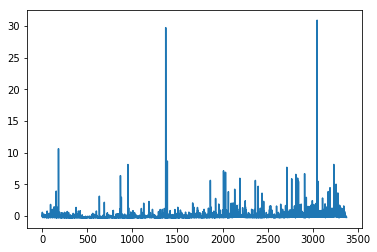

In [58]:
plt.plot(Y_transformed)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 621
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   past_min       3376 non-null   float64
 1   past_max       3376 non-null   float64
 2   past_median    3376 non-null   float64
 3   blck_med       3376 non-null   float64
 4   confirmation   3376 non-null   float64
 5   blck_min       3376 non-null   float64
 6   blck_max       3376 non-null   float64
 7   blck_totalfee  3376 non-null   float64
 8   blck_count     3376 non-null   int64  
 9   Eur_night      3376 non-null   int64  
 10  eth_high       3376 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 316.5 KB


In [67]:
# Model for total fee.
total_fee_rfr = RandomForestRegressor(n_estimators=10, min_samples_split=200, random_state=0)

In [68]:
total_fee_rfr.fit(X_vals_transformed, Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=200,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
total_fee_rfr.score(X_vals_transformed, Y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.23520986704026078

In [95]:
total_fee_rfr.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=209652396, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=398764591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            presort=False, random_state=924231285, splitter='best'),
 DecisionTreeReg

In [9]:
feb_df.drop(labels=['Unnamed: 0', 'time_stamp', 'block', 'hash', 'confirmation', 'Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
feb_df.head()

,totalfee,gasprice,gasamt,past_min,past_max,past_median,blck_med,blck_min,blck_max,blck_totalfee,blck_count,Eur_night,eth_high
0,0.003675,175.0,21000,124.743319,262.693332,185.197310,168.00,1.000000e-09,1116.434395,2.010777e+09,129,0,1373.845825
1,0.007061,138.0,51166,91.388586,132.276820,113.470664,154.00,1.000000e+00,613.353995,2.068317e+09,217,0,1373.845825
2,0.004126,123.0,33545,108.925975,140.282411,119.226554,134.00,1.210000e+02,2942.766178,2.051544e+09,243,0,1373.845825
3,0.021265,141.9,149861,55.230928,146.827749,122.134217,156.94,1.294000e+02,258.000000,1.953688e+09,266,0,1373.845825
4,0.003339,159.0,21000,78.181133,164.477451,131.180700,150.00,1.000000e+00,363.410425,1.906237e+09,323,0,1373.845825


In [12]:
X = feb_df[['gasprice', 'gasamt', 'past_min', 'past_max', 'past_median', 'blck_med',
       'blck_min', 'blck_max', 'blck_totalfee', 'blck_count', 'Eur_night',
       'eth_high']]

In [13]:
 y = feb_df[['totalfee']]

In [30]:
rregr = RandomForestRegressor(min_samples_split=100, random_state=0)

In [31]:
rregr.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
print(rregr.get_params(deep=True))

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [33]:
rregr.score(X, y)

0.8664538484599461

In [34]:
rregr.decision_path(X)

(<667x186 sparse matrix of type '<class 'numpy.longlong'>'
 	with 47289 stored elements in Compressed Sparse Row format>,
 array([  0,  19,  36,  55,  72,  93, 112, 129, 148, 167, 186]))

In [35]:
rregr.estimators_[0].feature_importances_

array([0.0174412, 0.9825588, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ])

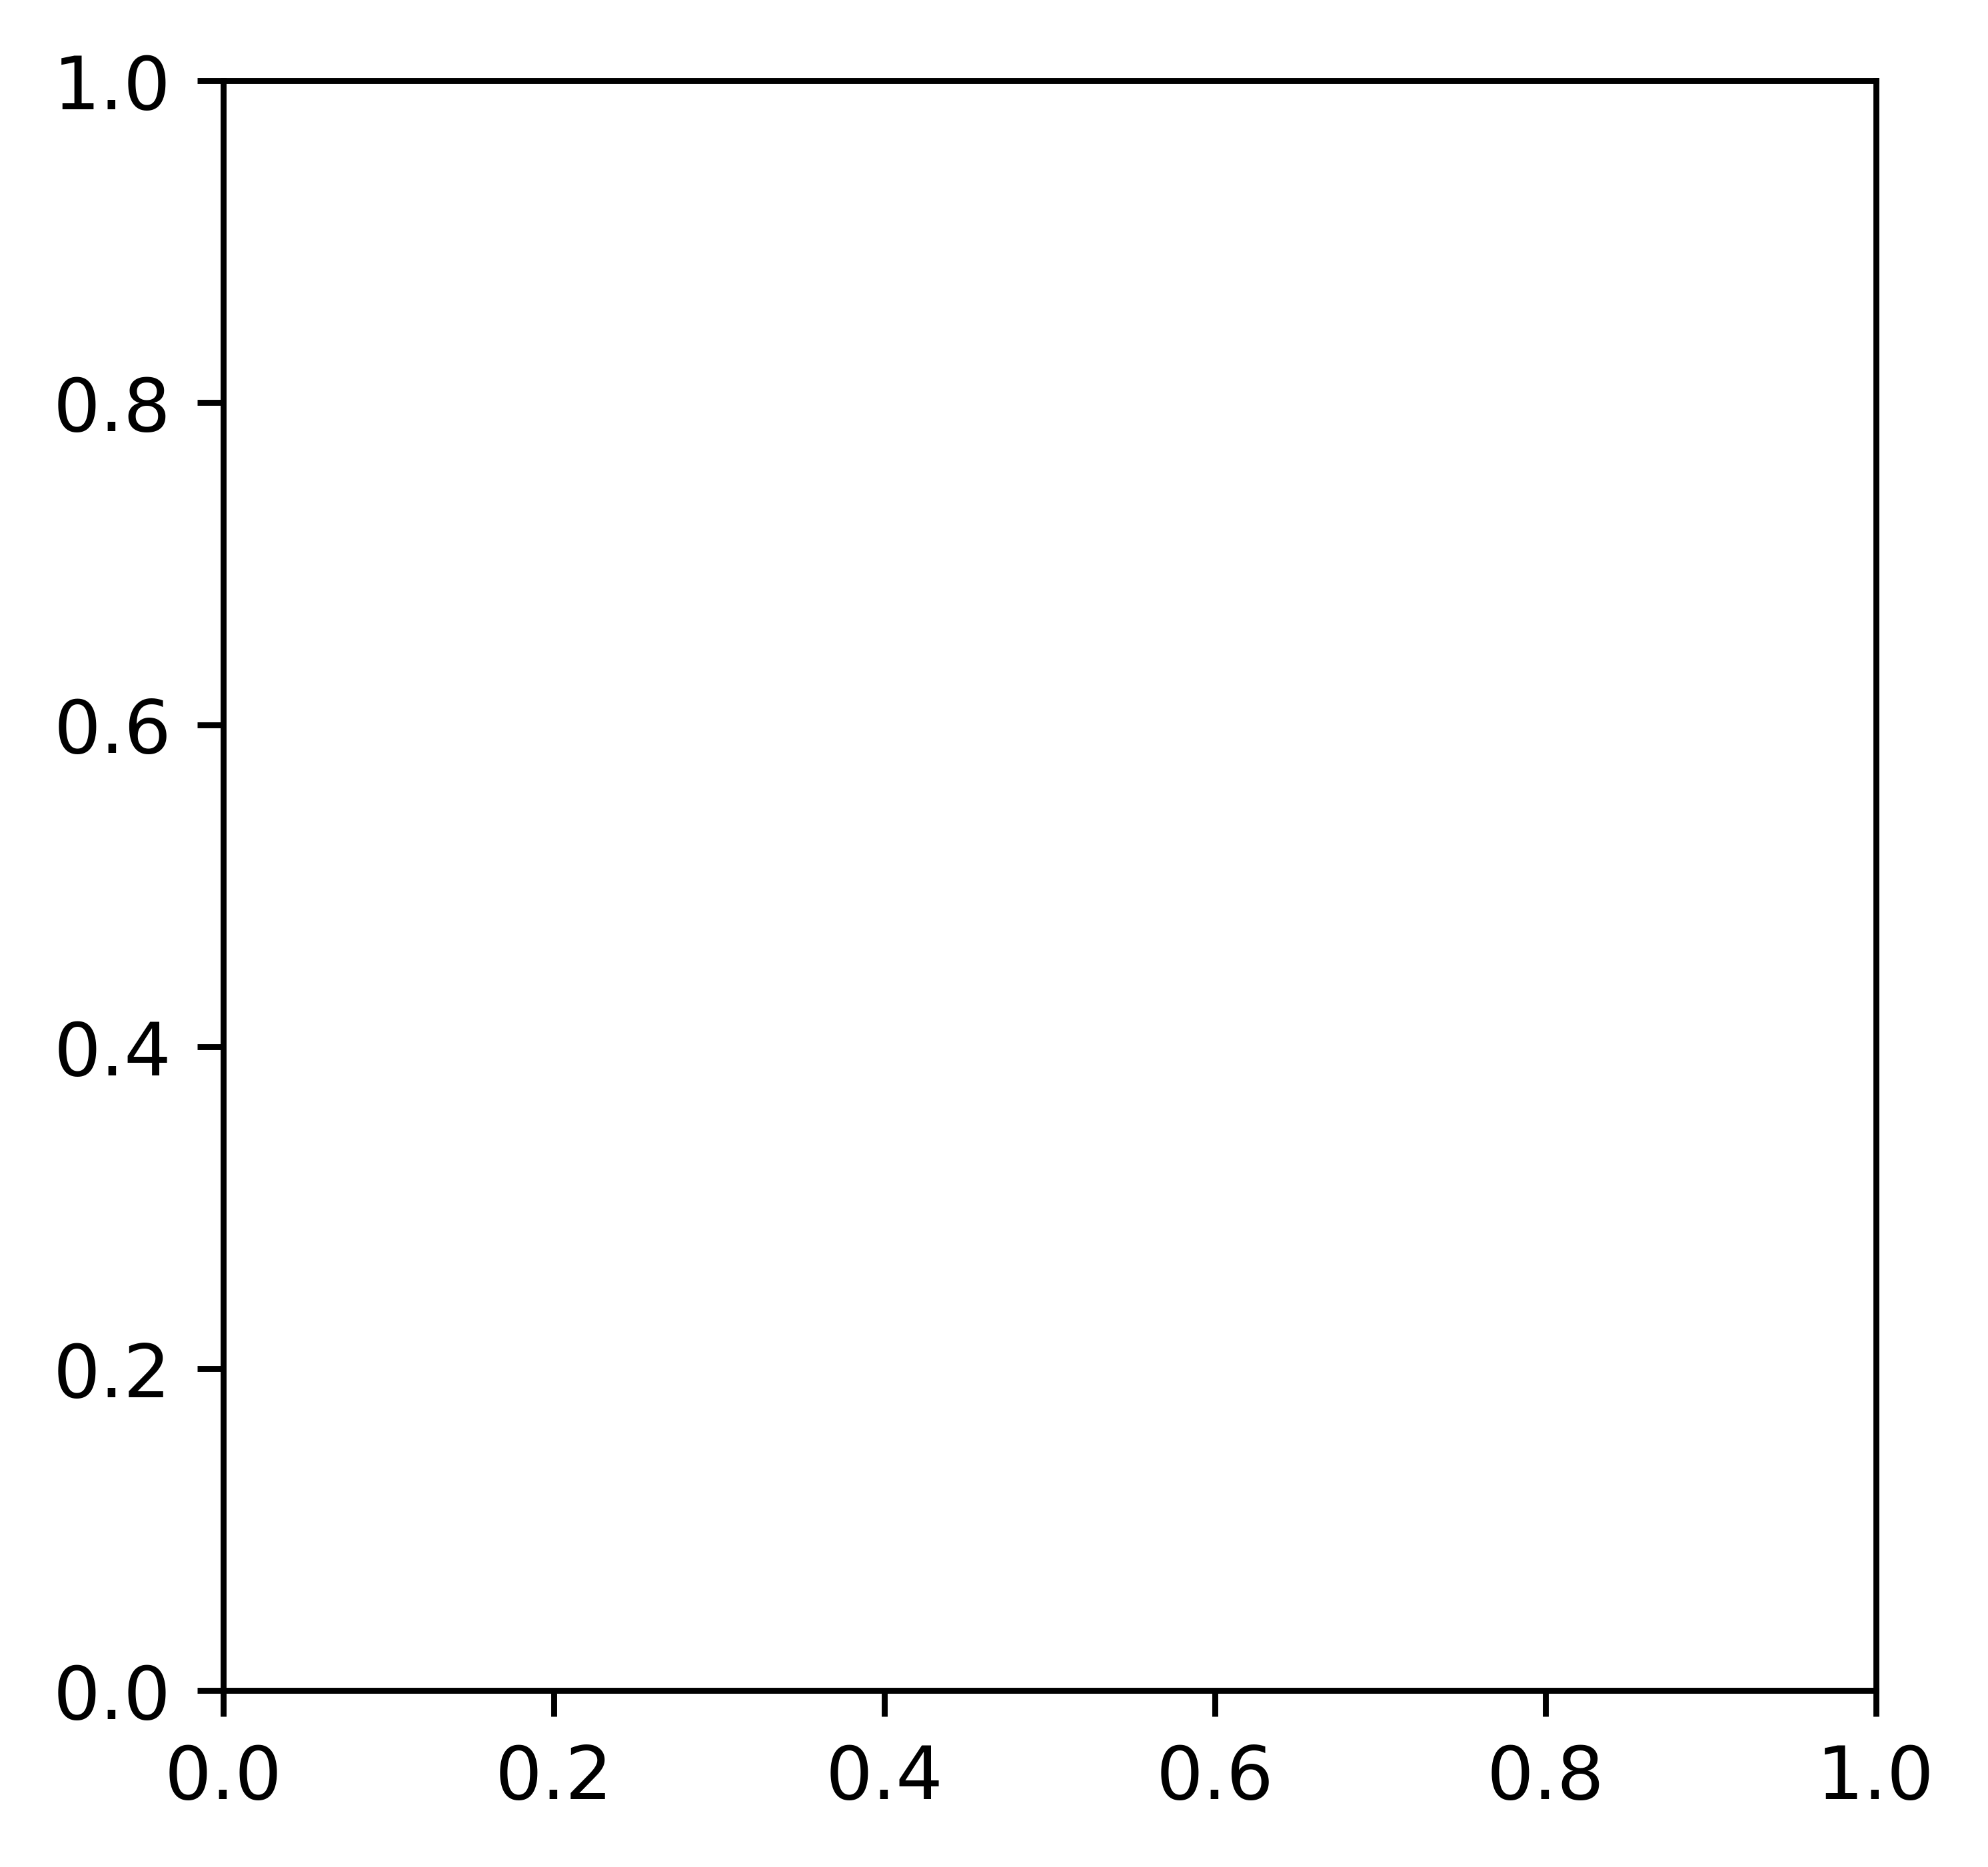

In [40]:
fn=X.columns
cn=y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.export_graphviz(rregr.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')